In [0]:
!unzip /content/'DATASET(150X150)'.zip

Archive:  /content/DATASET(150X150).zip
   creating: DATASET(150X150)/
   creating: DATASET(150X150)/Test/
   creating: DATASET(150X150)/Test/Fire/
  inflating: DATASET(150X150)/Test/Fire/image_11.jpg  
  inflating: DATASET(150X150)/Test/Fire/image_21.jpg  
  inflating: DATASET(150X150)/Test/Fire/image_12.jpg  
  inflating: DATASET(150X150)/Test/Fire/image_13.jpg  
  inflating: DATASET(150X150)/Test/Fire/image_14.jpg  
  inflating: DATASET(150X150)/Test/Fire/image_15.jpg  
  inflating: DATASET(150X150)/Test/Fire/image_16.jpg  
  inflating: DATASET(150X150)/Test/Fire/image_17.jpg  
  inflating: DATASET(150X150)/Test/Fire/image_18.jpg  
  inflating: DATASET(150X150)/Test/Fire/image_19.jpg  
  inflating: DATASET(150X150)/Test/Fire/image_1.jpg  
  inflating: DATASET(150X150)/Test/Fire/image_20.jpg  
  inflating: DATASET(150X150)/Test/Fire/image_31.jpg  
  inflating: DATASET(150X150)/Test/Fire/image_22.jpg  
  inflating: DATASET(150X150)/Test/Fire/image_23.jpg  
  inflating: DATASET(150X150

In [0]:
%matplotlib inline
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

def loadImageAsColor(imagePath):
    im = cv2.imread(imagePath)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    return im


def getdata(path):
    photos = {'im':[],'tag':[],'array':[]}
    for foto in glob.glob(path):
        try:
          foto_color = loadImageAsColor(foto)
          photos['array'].append(foto_color)
          foto = foto.split("/")
          photos["im"].append(foto[-1])
      
          photos["tag"].append(foto[-2])
        except:
          print(foto)
    df = pd.DataFrame(photos)
    new = pd.get_dummies(df["tag"])
    df_gt = df.join(new)
    
     
    return df_gt
   

data_train = getdata('/content/DATASET(150X150)/Train/*/*.jpg')

In [0]:
df_train = data_train
df_train.head(-10)

,im,tag,array,Fire,Neutral
0,image_9-1177.jpg,Neutral,"[[[123, 122, 78], [124, 123, 79], [126, 125, 8...",0,1
1,image_9-1829.jpg,Neutral,"[[[210, 212, 199], [210, 212, 199], [208, 210,...",0,1
2,image_9-504.jpg,Neutral,"[[[151, 161, 136], [149, 159, 134], [152, 160,...",0,1
3,image_9-1027.jpg,Neutral,"[[[101, 111, 103], [96, 106, 98], [101, 111, 1...",0,1
4,image_9-1367.jpg,Neutral,"[[[138, 118, 91], [137, 117, 90], [141, 120, 9...",0,1
...,...,...,...,...,...
5095,61.jpg,Fire,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1,0
5096,547.jpg,Fire,"[[[75, 64, 42], [161, 146, 141], [165, 143, 15...",1,0
5097,image_887.jpg,Fire,"[[[5, 37, 32], [7, 40, 33], [13, 42, 37], [18,...",1,0
5098,image_894.jpg,Fire,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1,0


In [0]:
df_train['gt'] = df_train[['Fire','Neutral']].apply(lambda x: pd.Series([x.values]), axis=1)

In [0]:
num_classes = 2

# input image dimensions
img_rows, img_cols, channels = 150, 150, 3

X = np.stack(df_train['array'])

print(X.shape)
y = np.stack(df_train['gt'])

# the data, split between train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

input_shape = (img_rows, img_cols, channels)
print(input_shape)

(5110, 150, 150, 3)
(4088, 150, 150, 3)
(150, 150, 3)


In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
import keras as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.models import model_from_json
from sklearn import preprocessing
import seaborn as sns
import re
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import pickle
import json
import time
from os import listdir
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

Using TensorFlow backend.


In [0]:
model = Sequential()
chanDim = -1
model.add(SeparableConv2D(16, (7, 7), padding="same",input_shape=input_shape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SeparableConv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(SeparableConv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# second set of FC => RELU layers
model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(num_classes))
model.add(Activation("softmax"))
model.compile(loss="binary_crossentropy",metrics=["accuracy"])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
filepath='Checkpoint_{epoch:02d}_{val_acc:.2f}'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
batch_size = 64
epochs = 100

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=callbacks_list)
import time
moment=time.localtime()
name='Model_{}_{}-{}-{}200x200.h5'.format(model.history.history["val_acc"][-1],moment[2],moment[3],moment[4])
import json

model_json = model.to_json()
with open(name+'.json', "w") as json_file:
    json.dump(model_json, json_file)

model.save_weights(name)

Train on 4088 samples, validate on 1022 samples
Epoch 1/100
4032/4088 [============================>.] - ETA: 3s - loss: 0.4026 - acc: 0.8542
Epoch 00001: val_acc improved from -inf to 0.29843, saving model to Checkpoint_01_0.30
4088/4088 [==============================] - 254s 62ms/sample - loss: 0.4065 - acc: 0.8537 - val_loss: 1.0930 - val_acc: 0.2984
Epoch 2/100
4032/4088 [============================>.] - ETA: 3s - loss: 0.2424 - acc: 0.9122
Epoch 00002: val_acc did not improve from 0.29843
4088/4088 [==============================] - 254s 62ms/sample - loss: 0.2418 - acc: 0.9119 - val_loss: 1.1828 - val_acc: 0.2984
Epoch 3/100
4032/4088 [============================>.] - ETA: 3s - loss: 0.1889 - acc: 0.9320
Epoch 00003: val_acc improved from 0.29843 to 0.40705, saving model to Checkpoint_03_0.41
4088/4088 [==============================] - 254s 62ms/sample - loss: 0.1880 - acc: 0.9325 - val_loss: 0.7047 - val_acc: 0.4070
Epoch 4/100
4032/4088 [============================>.] - ET

In [0]:
import time
moment=time.localtime()
name='Model_{}_{}-{}-{}150x150.h5'.format(model.history.history["val_acc"][-1],moment[2],moment[3],moment[4])
import json

model_json = model.to_json()
with open(name+'.json', "w") as json_file:
    json.dump(model_json, json_file)

model.save_weights(name)

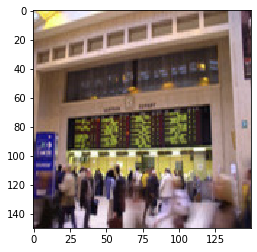

In [0]:
test= np.array([loadImageAsColor('/content/DATASET(150X150)/Test/Neutral/image_56.jpg')])
plt.imshow(Image.fromarray(test.squeeze()))

In [0]:
pred = model.predict(test)[0]
print(pred)
print("Probs -> Fire:{0:.3f} Neutral:{1:.3f}".format(pred[0],pred[1]))

[1.080185e-09 1.000000e+00]
Probs -> Fire:0.000 Neutral:1.000


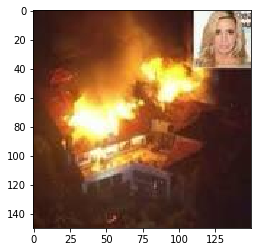

In [0]:
test2= np.array([loadImageAsColor('/content/DATASET(150X150)/Test/Fire/image_13.jpg')])
plt.imshow(Image.fromarray(test2.squeeze()))

In [0]:
pred = model.predict(test2)[0]

print("Probs -> Fire:{0:.3f} Neutral:{1:.3f}".format(pred[0],pred[1]))

Probs -> Fire:1.000 Neutral:0.000
